## Observations and Insights 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results, how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Checking the number of mice.
total_mice=combined_data['Mouse ID'].nunique()
print(f'{total_mice} mice were used for this study.')

249 mice were used for this study.


In [33]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"] =="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Checking the number of mice in the clean DataFrame.
total_clean_data_mice=clean_df['Mouse ID'].nunique()
print(f'Number of mice in the clean DataFrame is {total_clean_data_mice}.')

Number of mice in the clean DataFrame is 248.


## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculate the mean of the tumor volume (tv) for each regimen
tv_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# Calculate the median of the tumor volume (tv) for each regimen
tv_med = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# Calculate the variance of the tumor volume (tv) for each regimen
tv_var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# Calculate the standard deviation of the tumor volume (tv) for each regimen
tv_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# Calculate the unbiased standard error of the tumor volume (tv) for each regimen
tv_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Create a data frame to display calculated statistics
summary_statistics=pd.DataFrame({"Mean":tv_mean ,
                                 "Median" :tv_med ,
                                 "Variance" :tv_var,
                                 "Standard Deviation": tv_std,
                                 "Standard Error" : tv_sem})

# Format and Display the summary table
summary_statistics.round(2)

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summary_statistics_2 = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

# Format and Display the summary table
summary_statistics_2.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

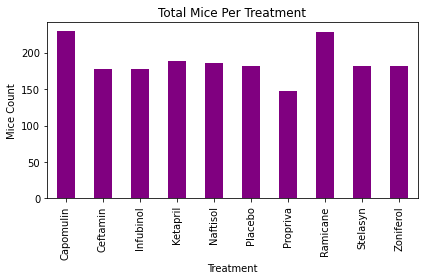

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Calculate the total number of mice for each treatment
mice_count = clean_df.groupby("Drug Regimen").count()['Mouse ID']

# Generate a bar plot using pandas
mice_count.plot.bar(color = 'purple')

# Assign a title for the bar chart
plt.title('Total Mice Per Treatment')

# Create labels for the X and Y axis
plt.ylabel('Mice Count')
plt.xlabel('Treatment')
plt.tight_layout()
plt.show()

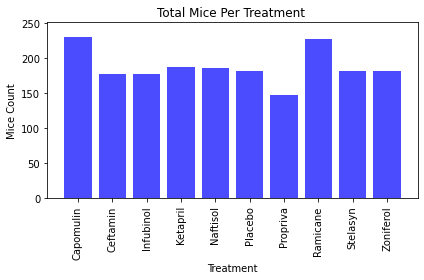

In [40]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create an array that contains the total number of mice for each treatment
y_axis = mice_count
x_axis = np.arange(len(mice_count))

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations,mice_count.index.values, rotation="vertical")

plt.bar(x_axis, y_axis, color='b', alpha=0.7, align="center")

# Add title and labels for the chart
plt.title("Total Mice Per Treatment ")
plt.xlabel("Treatment")
plt.ylabel("Mice Count")

# Set the y limits of the current chart
plt.ylim(0, 251)
plt.yticks(np.arange(0,251, 50.0))
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Sex'>

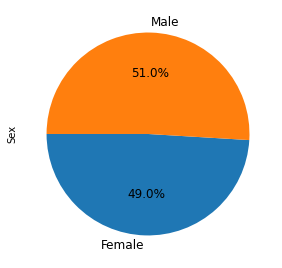

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender = clean_df.groupby('Sex')

gender_count = grouped_gender["Sex"].count()

# Create pie plot with data
plt.figure(figsize=(10,6))

ax1 = plt.subplot(121, aspect = 'equal')

gender_count.plot(kind='pie', y = "Quantity", ax=ax1, autopct = '%1.1f%%',
                  startangle = 180, shadow = False, legend = False, fontsize = 12)

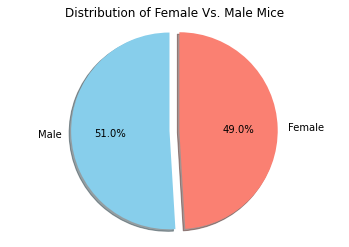

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean_df["Sex"].value_counts()

#Labels sections of the pie plot
labels = ["Male", "Female"]

# Define colors of each section of pie plot
colors = ["skyblue", "salmon"]

# Define counts
counts = np.array(gender)

# Define each section
explode = (0.1, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 90)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Female Vs. Male Mice")

# Display pie plot
plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

treatment_df = clean_df[(clean_df["Drug Regimen"] == "Capomulin") |
                        (clean_df["Drug Regimen"] == "Ramicane")  |
                        (clean_df["Drug Regimen"] == "Infubinol") |
                        (clean_df["Drug Regimen"] == "Ceftamin")
                       ]

last_timepoint = treatment_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, clean_df, on=("Mouse ID","Timepoint"), how = 'left')
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume (tv) data (for plotting)
tv_list = []
outliers_list = []

# Loop through each type of treatment and calculate quartiles, IQR, upper and lower bounds
for treatment in treatment_list:
    
    tv_data = merged_df.loc[merged_df["Drug Regimen"] == treatment, :]
    
    tv_list.append(tv_data['Tumor Volume (mm3)'])

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tv_data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    IQR = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5*IQR)
    upper_bound = quartiles[0.75] + (1.5*IQR)
    
    
    print(f"---------------------------------------------------------\n\
The lower quartile of {treatment} is {lower_q}.\n\
The upper quartile of {treatment} is {upper_q}.\n\
The IQR value of {treatment} is {IQR}.\n\
The outliers of {treatment} would be below {lower_bound}.\n\
The outliers of {treatment} would be above {upper_bound}.\n\
----------------------------------------------------------\n")
    # Append any outliers into the list
    outliers = tv_data.loc[(tv_data['Tumor Volume (mm3)'] > upper_bound) |
                           (tv_data['Tumor Volume (mm3)'] < lower_bound)]
    outliers_list.append(outliers)

---------------------------------------------------------
The lower quartile of Capomulin is 32.37735684.
The upper quartile of Capomulin is 40.1592203.
The IQR value of Capomulin is 7.781863460000004.
The outliers of Capomulin would be below 20.70456164999999.
The outliers of Capomulin would be above 51.83201549.
----------------------------------------------------------

---------------------------------------------------------
The lower quartile of Ramicane is 31.56046955.
The upper quartile of Ramicane is 40.65900627.
The IQR value of Ramicane is 9.098536719999998.
The outliers of Ramicane would be below 17.912664470000003.
The outliers of Ramicane would be above 54.30681135.
----------------------------------------------------------

---------------------------------------------------------
The lower quartile of Infubinol is 54.04860769.
The upper quartile of Infubinol is 65.52574285.
The IQR value of Infubinol is 11.477135160000003.
The outliers of Infubinol would be below 36.832

In [45]:
# Open up the list of data frame and combine them into one big dataframe, which contains the info of the outliers
for i in range(len(outliers_list)):
    if i == 0:
        merged_outlier_list = outliers_list[0]
    else:
        merged_outlier_list = merged_outlier_list.merge(outliers_list[i], how='outer')
        
merged_outlier_list

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,c326,5,Infubinol,Female,18,25,36.321346,0


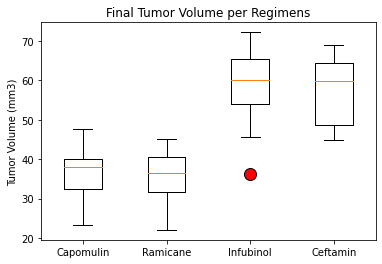

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
props = dict(markerfacecolor = 'red', markersize = 12)
plt.boxplot(tv_list,labels=treatment_list,flierprops = props)

plt.show()

## Line and Scatter Plots

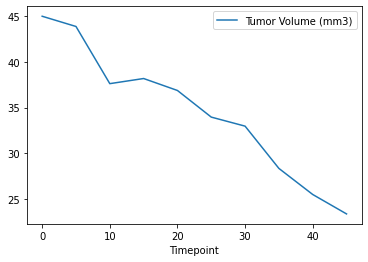

In [47]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
random_MouseID = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')].iloc[0]['Mouse ID']
random_data = clean_df.loc[(clean_df['Mouse ID'] == random_MouseID)]

random_data.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')

plt.show()

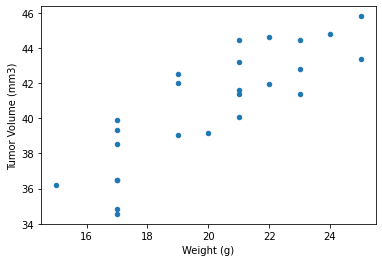

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')]
avg_volume_data = capomulin_data.groupby("Mouse ID")[['Weight (g)', 'Tumor Volume (mm3)']].mean()

avg_volume_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

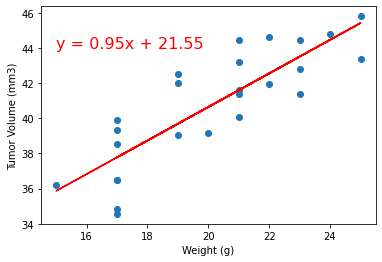

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_volume_data['Weight (g)'], avg_volume_data['Tumor Volume (mm3)'])
regress_values = avg_volume_data['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#avg_volume_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
plt.scatter(avg_volume_data['Weight (g)'], avg_volume_data['Tumor Volume (mm3)'])
plt.plot(avg_volume_data['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(15,44),fontsize=16,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [51]:
# Calculate the correlation

correlation = st.pearsonr(avg_volume_data['Weight (g)'], avg_volume_data['Tumor Volume (mm3)'])

print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


# Observations and Insights:

 - 249 mice were used for this study
 - As per the box plot chart, Infubolin was the only treatment that produced an outlier value.
 - There is a postive correlation of 0.84 between mouse weight and average tumor volume.